              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (56) reached and the optimization hasn't converged yet.
  warnings.warn(


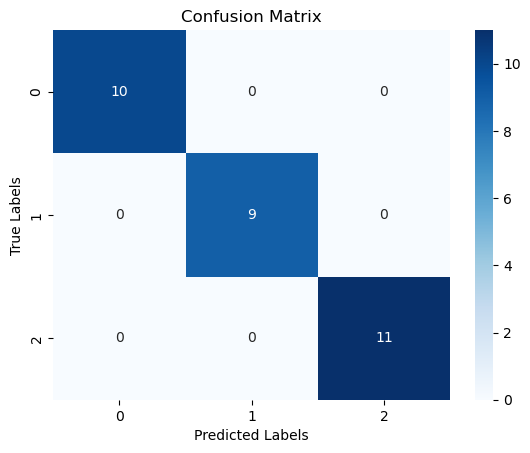

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = load_iris()

X = data.data
y = data.target

scalar = StandardScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=56)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(classification)

sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [3]:
X_train.ndim

2

In [5]:
y_train.ndim

1

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6937 - loss: 0.7571 - val_accuracy: 0.9167 - val_loss: 0.3940
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.2768 - val_accuracy: 0.9167 - val_loss: 0.2836
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1516 - val_accuracy: 0.9167 - val_loss: 0.3238
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9424 - loss: 0.1163 - val_accuracy: 0.9167 - val_loss: 0.4765
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.1019 - val_accuracy: 0.9167 - val_loss: 0.3867
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9762 - loss: 0.0633 - val_accuracy: 0.9167 - val_loss: 0.3027
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9631 - loss: 0.1179 - val_accuracy: 0.9167 - val_loss: 0.3543
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1103 - val_accuracy: 0.9167 - val_loss: 0.4689
Ep

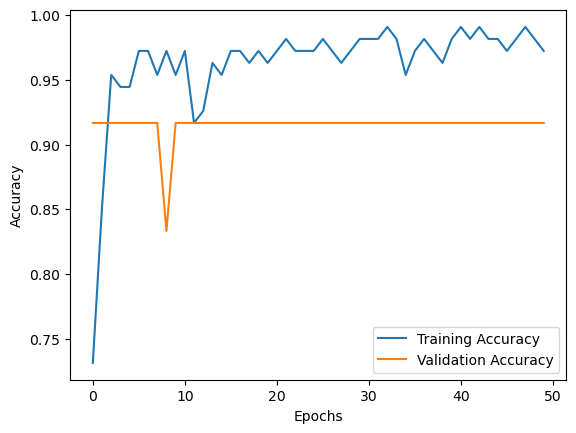

In [111]:
import numpy as np 
import tensorflow as tf 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelBinarizer 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt

# Data Preprocessing: 
# • Load the Iris dataset using `sklearn.datasets.load_iris()`. 
# • Standardize the data using `StandardScaler`. 
# • Binarize the data. 
label_binarizer = LabelBinarizer() 
y_train = label_binarizer.fit_transform(y_train) 
y_test = label_binarizer.transform(y_test)

# Define the MLP model 
model = Sequential([ 
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer 
    Dense(32, activation='relu'),  # Second hidden layer 
    Dense(3, activation='softmax')  # Output layer with 3 classes (Iris Setosa, Versicolor, Virginica) 
]) 

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model 
history = model.fit(X_train, y_train, epochs=50, batch_size=8, 
validation_split=0.1, verbose=1)

# Evaluate the model 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0) 
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy over epochs 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()
